# <u>VIDEO ENGAGEMENT SCORE PREDICTION</u>

# Objective
The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the user level.

# Training / Test Data

   - `row_id` -  Unique identifier of the row
   
   - `user_id` - Unique identifier of the user
   
   - `category_id` - Category of the video
   
   - `video_id` - Unique identifier of the video
   
   - `age` - Age of the user
   
   - `gender` - Gender of the user (Male and Female)
   
   - `profession` - Profession of the user (Student, Working Professional, Other)
   
   - `followers` - No. of users following a particular category
   
   - `views` - Total views of the videos present in the particular category
   
   - `engagement_score` - Engagement score of the video for a user (Target Variable: not in test set)

# Steps performed:
   1. Loading and understanding the data
   1. EDA
   2. Feature Engineering
   3. Feature Selection
   4. Base Model
   5. Model Comparison
   6. Conclusions
   7. Next Steps

## Import Libraries
Let us first import the basic libraries which we will be using for our EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
%matplotlib inline

## 1) <u>Loading and understanding the data</u>
As part of the first step let us load both of our train and test set and understand the numbers and types of features present.

In [2]:
train = pd.read_csv('train_0OECtn8.csv')
test = pd.read_csv('test_1zqHu22.csv')

In [3]:
train.head(3)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35


In [4]:
train.shape       # Number of rows and columns

(89197, 10)

In [5]:
train.dtypes      # Feature wise data types of the columns

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

In [6]:
train.info()      # Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


As we see, the features are distributed as follows:
   - 7 numerical feature
   - 2 categorical features
   - 1 floating type target variable

### Questions answered:
   - Number of columns and rows in train and test set?
   - How many categorical and numerical features are present?
   - Are there missing values?

## 2) <u>EDA</u>
This is the most important part of any data science project! Exploratory Data Analysis is the process of drawing patterns and relations to help us in getting clarity and better understanding of our data which in turn eases the process of feature engineering and modelling.

We are going to perform the following as part of this step:
   - Check missing data
   - Understand categorical features
   - Analyse the numeric features
   - Check correlation
   - Detect outliers

In [7]:
train.isnull().sum()        # Count of missing values within each feature

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

### We have a decent dataset!! Looks like we don't have any missing values. Let us verify that visually

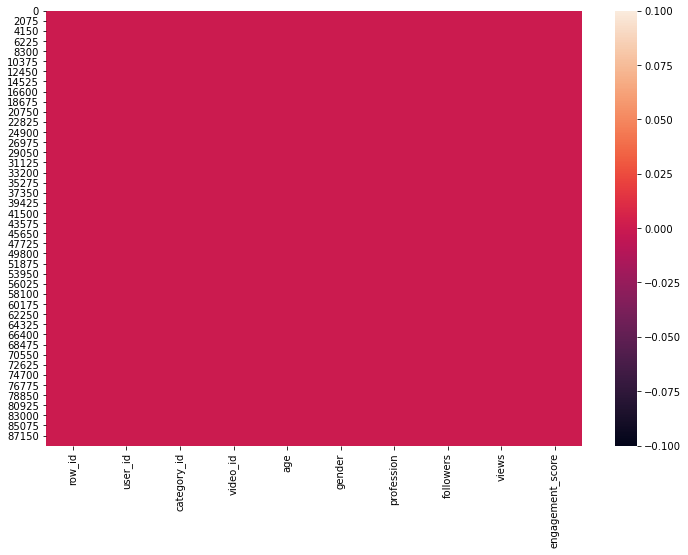

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull())              # Missing values in train set
plt.show()

### Categorical Features 

In [11]:
cat_features = [i for i in train.columns if train[i].dtypes == 'object']     # list of categorical features
cat_features

['gender', 'profession']

In [12]:
from simple_colors import *        # Output formatting

def val_count(df, features):
    for i in features:
        print(red(i.upper(), ['bold', 'underlined']))
        print(df[i].value_counts(),'\n')

In [13]:
val_count(train, cat_features)

GENDER
Male      52397
Female    36800
Name: gender, dtype: int64 

PROFESSION
Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64 



In [14]:
val_count(test, cat_features)

GENDER
Male      6377
Female    4744
Name: gender, dtype: int64 

PROFESSION
Student                 5572
Other                   3366
Working Professional    2183
Name: profession, dtype: int64 



We see that number of males are greater both in test and train set. Also, students are dominating in both the sets. We also have few working professions and folks from other professionals as well. Let us verify our conclusions via pie-chart

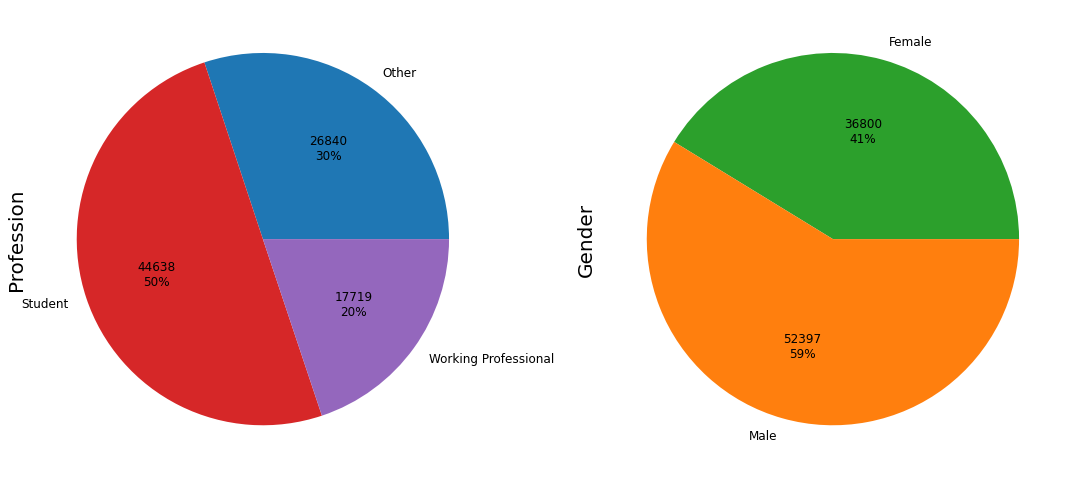

In [15]:
def label_function(val):          # To print values on each category                              
    return f'{val / 100 * len(train):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 15))

train.groupby('profession').size().plot(kind='pie',  autopct=label_function, textprops={'fontsize': 12}, colors=['C0', 'C3', 'C4'], ax=ax1)
train.groupby('gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12}, colors=['C2', 'C1'], ax=ax2)

ax1.set_ylabel('Profession', size=20)
ax2.set_ylabel('Gender', size=20)

plt.tight_layout()
plt.show()

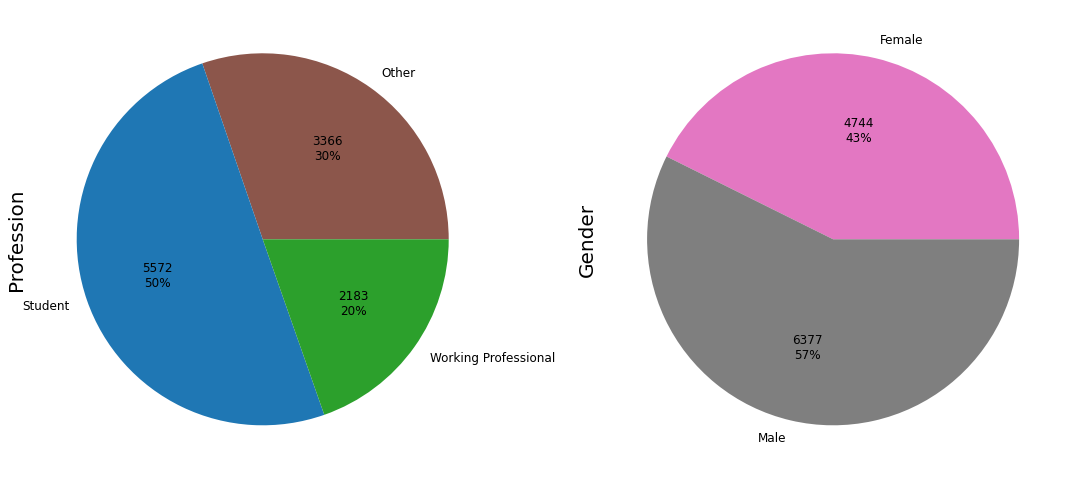

In [16]:
def label_function(val):
    return f'{val / 100 * len(test):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 15))

test.groupby('profession').size().plot(kind='pie',  autopct=label_function, textprops={'fontsize': 12}, colors=['C5', 'C0', 'C2'], ax=ax1)
test.groupby('gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12}, colors=['C6', 'C7'], ax=ax2)

ax1.set_ylabel('Profession', size=20)
ax2.set_ylabel('Gender', size=20)

plt.tight_layout()
plt.show()

The above distribution of groups within the categorical features shows that the trend / pattern is same in training and test dataset

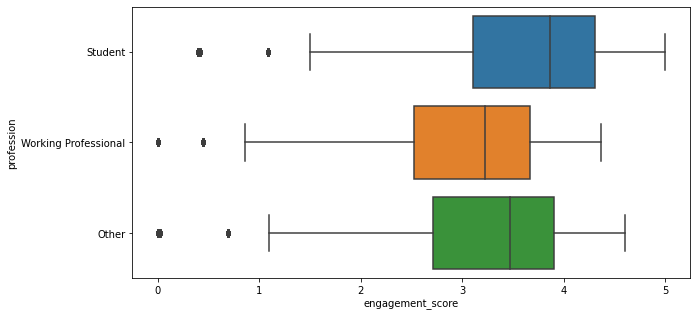

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot( x=train["engagement_score"], y=train["profession"] )         # Anomalies
plt.show()

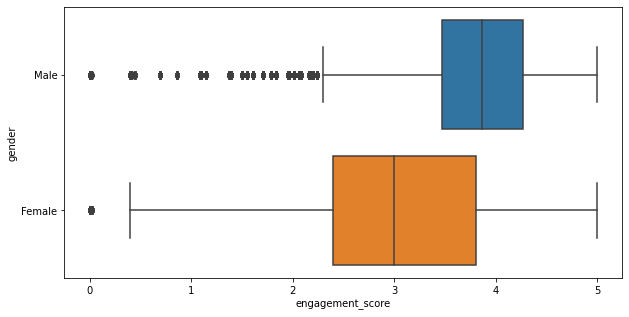

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot( x=train["engagement_score"], y=train["gender"] )
plt.show()

We see there are some outliers in profession feature for every group. The boxplot also gives us statistical information about the data. For example for the male gender the range of engagement score is from 2.2 to 5 and the mean is at 3.9.

### Numerical Features

Features to be considered:

- user_id
- category_id
- video_id
- age
- followers
- views

In [19]:
num_feature_all = [i for i in train.columns if train[i].dtypes == 'int64']
num_feature_id = num_feature_all[1:4]            # id columns
num_feature = num_feature_all[4:]               # non-id columns

#### Let us first see the non id columns

In [20]:
# Let us check some statistical values (like the range, mean, percentiles)
train[num_feature].describe()

,age,followers,views
count,89197.000000,89197.000000,89197.000000
mean,24.848616,252.460172,502.980268
std,8.955535,46.094468,268.569482
min,10.000000,160.000000,30.000000
25%,18.000000,230.000000,229.000000
50%,23.000000,240.000000,467.000000
75%,32.000000,280.000000,714.000000
max,68.000000,360.000000,1000.000000


In [21]:
val_count(train, num_feature)                     # Values counts of each group within different feature

AGE
18    4870
19    4528
20    4399
17    4356
16    4014
15    3875
21    3722
22    3576
14    3086
23    2971
24    2915
31    2796
30    2781
33    2756
28    2687
32    2687
29    2602
13    2588
34    2541
26    2507
25    2463
35    2422
27    2301
36    2003
37    1816
12    1776
38    1480
39    1238
11    1171
40    1066
41     834
10     752
42     675
43     592
44     449
46     343
45     340
47     264
48     197
50     172
49     131
51      97
53      81
52      66
54      51
55      48
57      40
56      24
58       8
63       8
68       6
66       5
64       5
59       4
67       3
60       3
61       3
62       3
Name: age, dtype: int64 

FOLLOWERS
230    16477
240    14767
280     7559
180     7092
270     6965
250     5533
320     5146
340     4941
210     4038
260     3340
220     2838
330     2712
290     2178
160     1885
360     1810
200     1680
190      236
Name: followers, dtype: int64 

VIEWS
628     9090
229     8104
317     4880
369     4679
909     404

In [22]:
def num_plot(df, col):
    '''
    Takes dataframe and color to illustrate countplot
    '''
    for i in num_feature:
        plt.figure(figsize=(10,7))
        sns.countplot(df[i], color=col)
        plt.title(i.upper())
        plt.show()

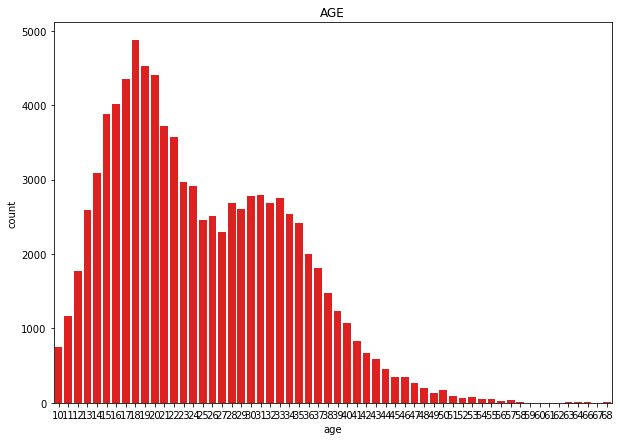

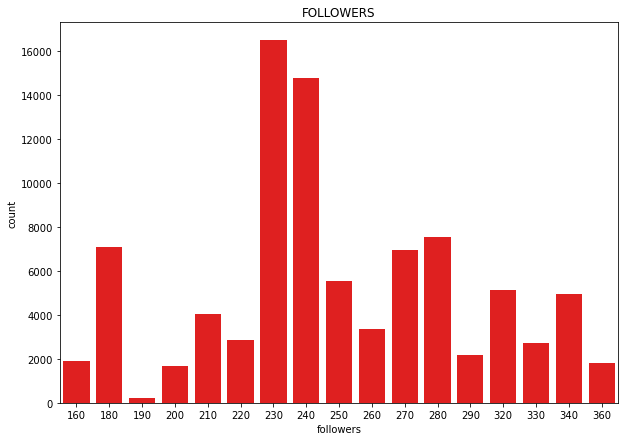

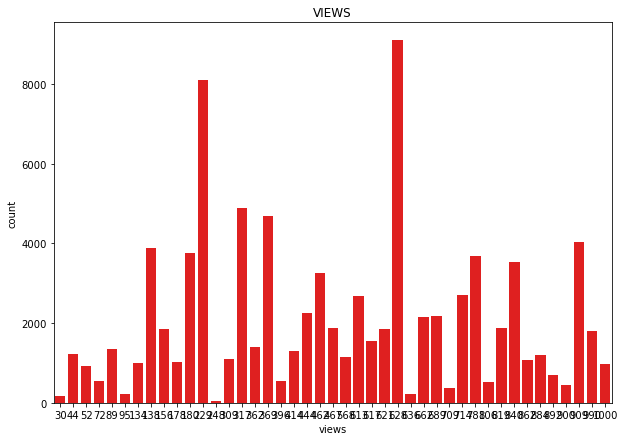

In [23]:
num_plot(train, 'red')

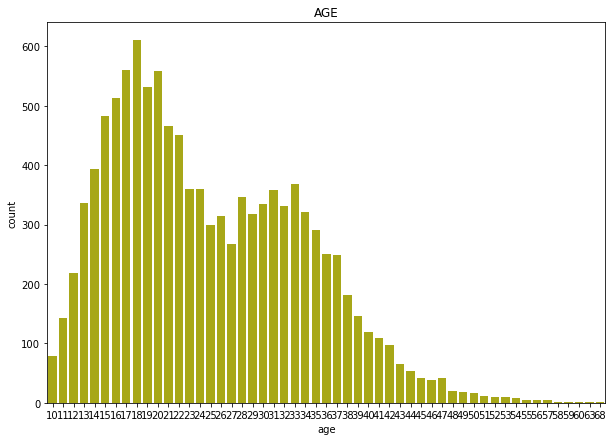

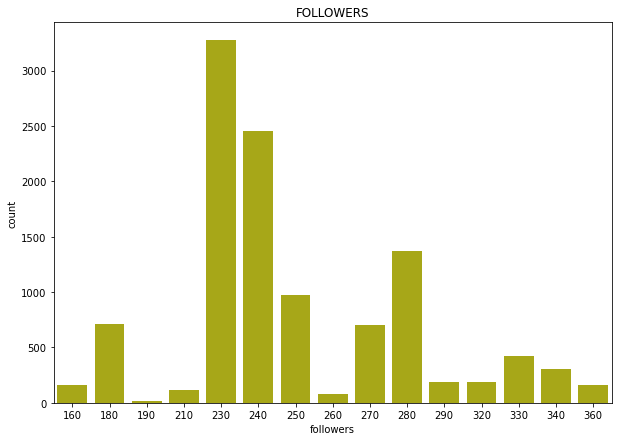

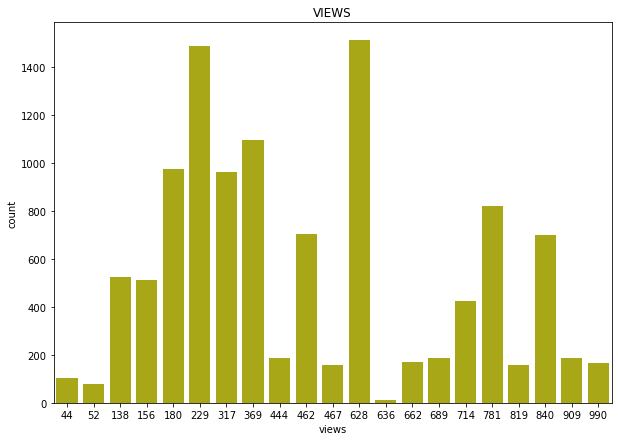

In [24]:
num_plot(test, 'y')

## Detect outliers

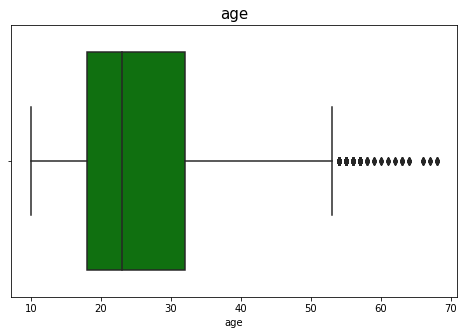

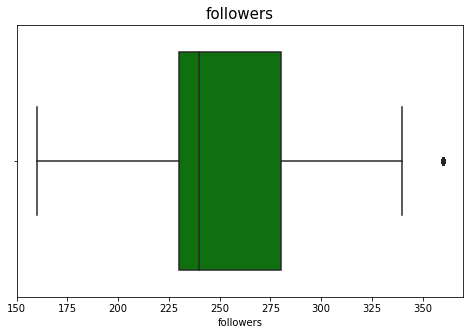

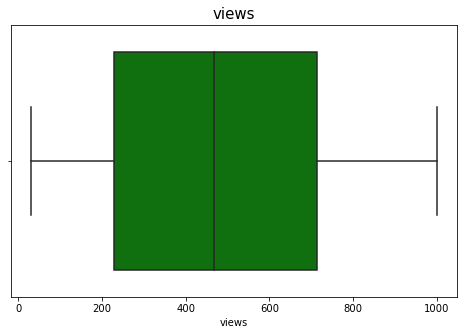

In [25]:
for i in num_feature:           # Boxplot of non-id numerical columns
    plt.figure(figsize=(8,5))
    sns.boxplot(train[i], color='g')
    plt.title(i, fontsize=15)
    plt.show()

We see a couple of outliers in age feature and a single in followers. The views feature is well distributed within the range of 0 to 1000 with a mean of around 475. We will handle the outliers for age feature later in our feature engineering section.

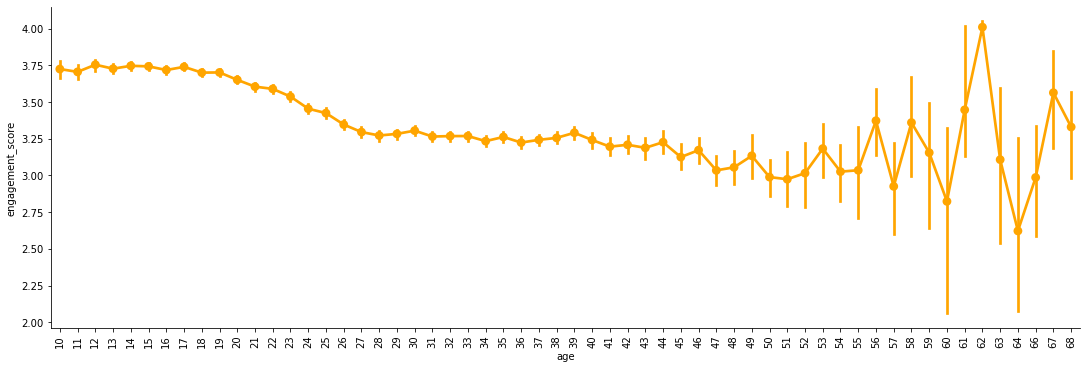

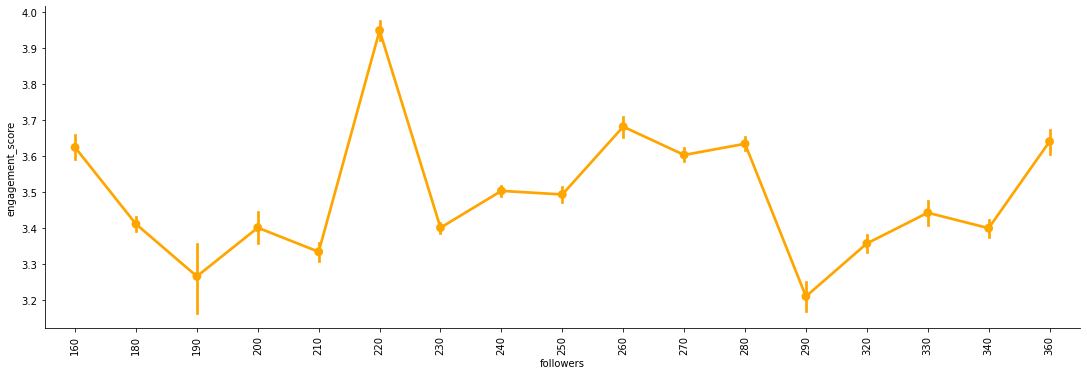

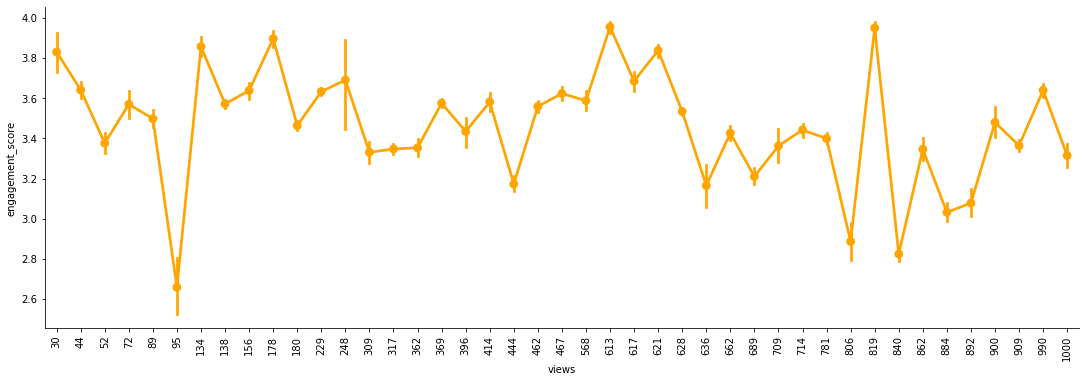

In [26]:
for i in num_feature:           # to see the variation of the score with varying values within each feature
    sns.catplot(x=i, y='engagement_score', data=train, kind='point', aspect=3, color='orange')
    plt.xticks(rotation=90)
    plt.show()

Theb above bivariate analysis shows how the engagement score varies with increaing feature values. Key points to note:
   - Engagement score is consistently high for viewers less than 40 yrs, beyond which the score is quite unstable
   - Videos with 220 followers seem to perform exceptionally well whereas those with 190 and 290 have done poorly
   - Videos with view count 95, 806 and 840 are least engaging. All others have score above 3

## ID features

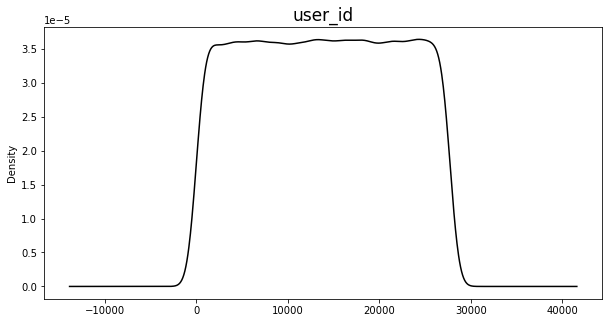

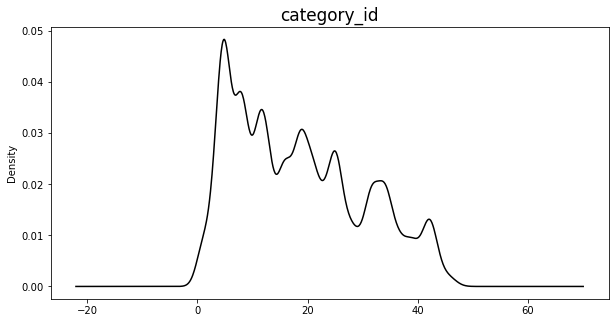

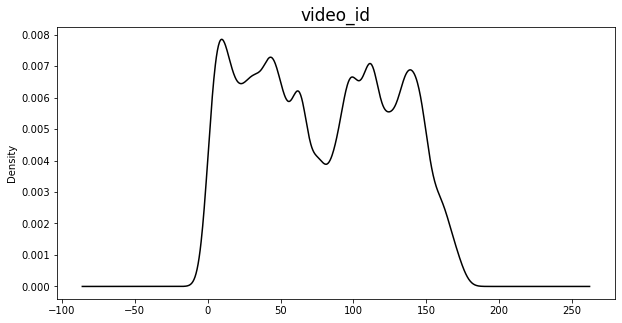

In [27]:
for i in num_feature_id:          # to visualize spread of id columns
    plt.figure(figsize=(10,5))
    train[i].plot(kind='density', color='black')
    plt.title(i, fontsize=17)
    plt.show()

# Features vs Target Relation

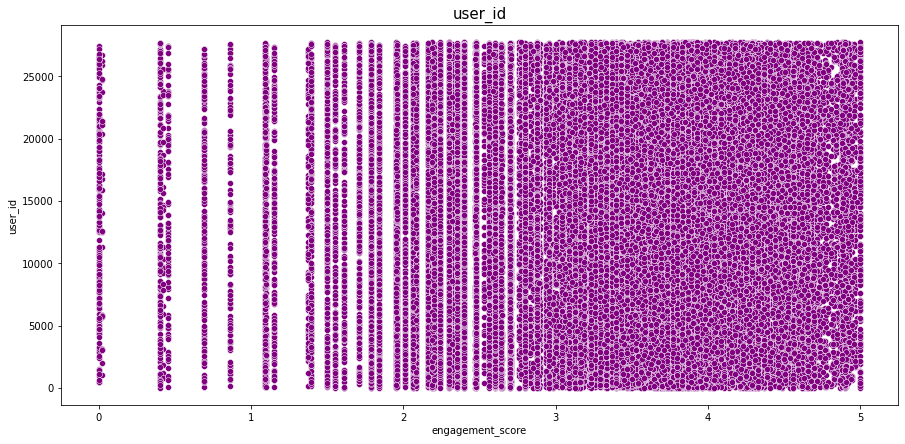

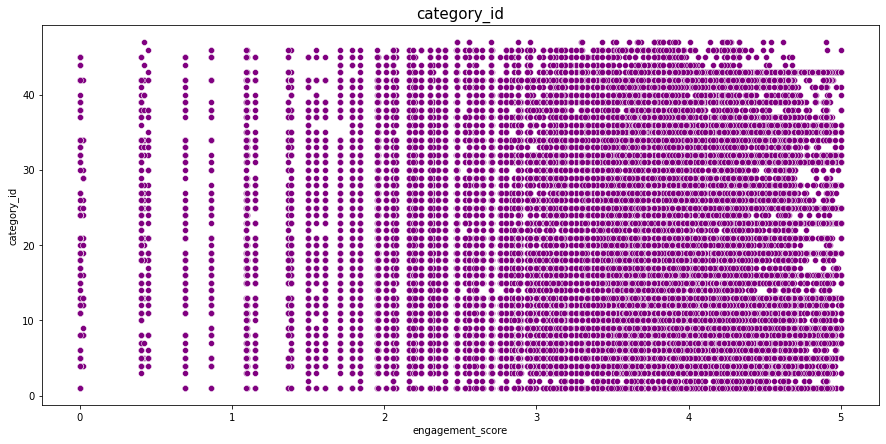

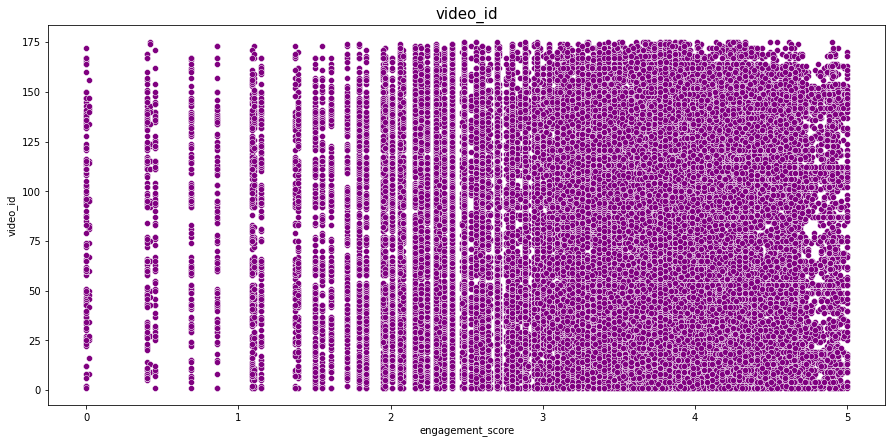

In [28]:
for i in num_feature_id:              # to visualize spread of id columns with respect to target variable
    
    plt.figure(figsize=(15,7))
    sns.scatterplot(y=train[i], x=train['engagement_score'], color='purple')
    plt.title(i, fontsize=15)
    plt.show()

Conclusion from the above relation: Greater the ids' value more is the engagement. All the features follow the same trend

## Correlation values

In [29]:
train.corr(method='spearman')

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
row_id,1.000000,-0.006959,0.002198,0.000631,-0.005276,-0.000156,-0.001807,-0.003993
user_id,-0.006959,1.000000,0.001358,0.005111,0.000193,-0.003117,-0.001499,-0.003491
category_id,0.002198,0.001358,1.000000,0.551871,-0.005546,0.050237,0.057877,-0.082837
video_id,0.000631,0.005111,0.551871,1.000000,-0.003975,0.133103,-0.027851,-0.022974
age,-0.005276,0.000193,-0.005546,-0.003975,1.000000,0.005214,0.010015,-0.270744
followers,-0.000156,-0.003117,0.050237,0.133103,0.005214,1.000000,0.274593,0.010973
views,-0.001807,-0.001499,0.057877,-0.027851,0.010015,0.274593,1.000000,-0.084775
engagement_score,-0.003993,-0.003491,-0.082837,-0.022974,-0.270744,0.010973,-0.084775,1.000000


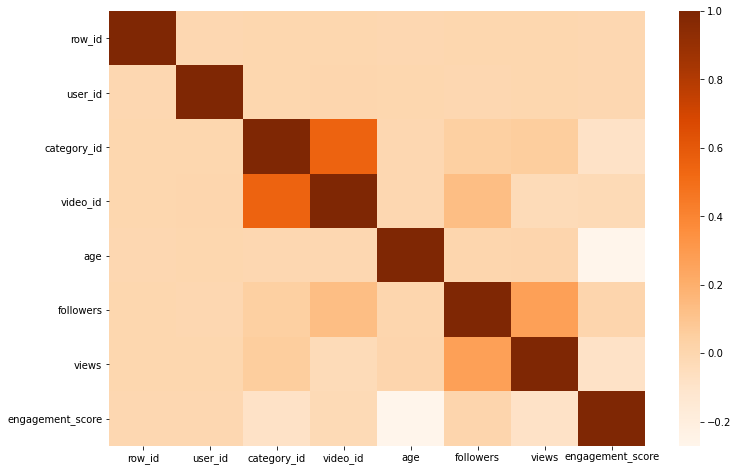

In [30]:
plt.figure(figsize=(12,8))                        # To visualize the correlation among different features
sns.heatmap(train.corr(method='spearman'), cmap='Oranges')
plt.show()

The correlation map and correlation table above say that video_id and category_id are highly positively correlated. Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables

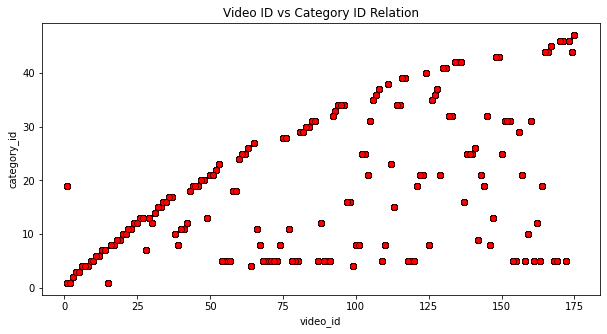

In [31]:
plt.figure(figsize=(10,5))                         # to verify the above conclusion 
plt.scatter(x=train['video_id'], y=train['category_id'], color='red', edgecolors="#000000", linewidths=0.5)
plt.xlabel("video_id")
plt.ylabel("category_id")
plt.title('Video ID vs Category ID Relation')
plt.show()

We see that category_id and video_id are truly positively correlated: as one increases, the other increases too—mostly.

<Figure size 1008x720 with 0 Axes>

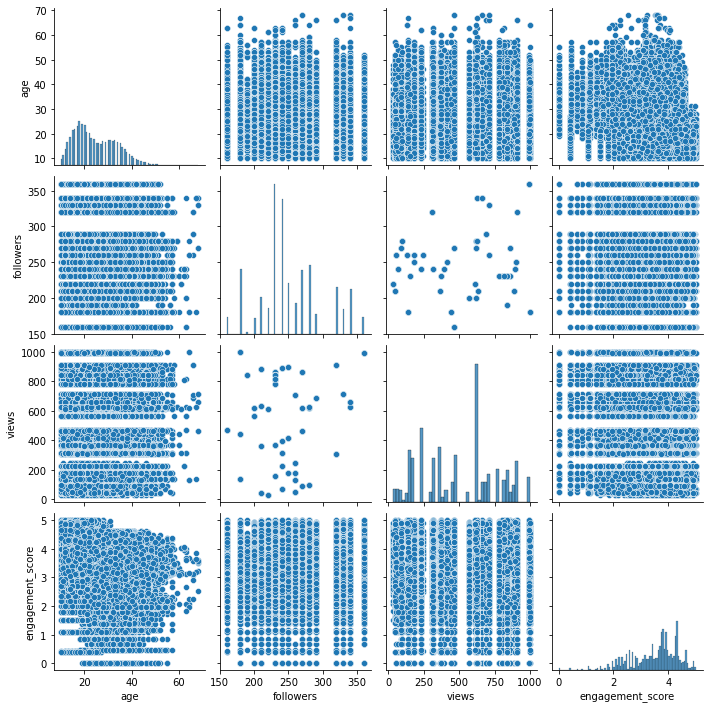

In [32]:
plt.figure(figsize=(14,10))                     # Summary of variation of one feature with respect to another
sns.pairplot(train, vars = ['age', 'followers', 'views', 'engagement_score'], palette='Dark2')
plt.show()

In [33]:
train.video_id.describe()

count    89197.000000
mean        77.715383
std         48.469656
min          1.000000
25%         34.000000
50%         76.000000
75%        120.000000
max        175.000000
Name: video_id, dtype: float64

### Which video_id is most trensding and which one is the least?

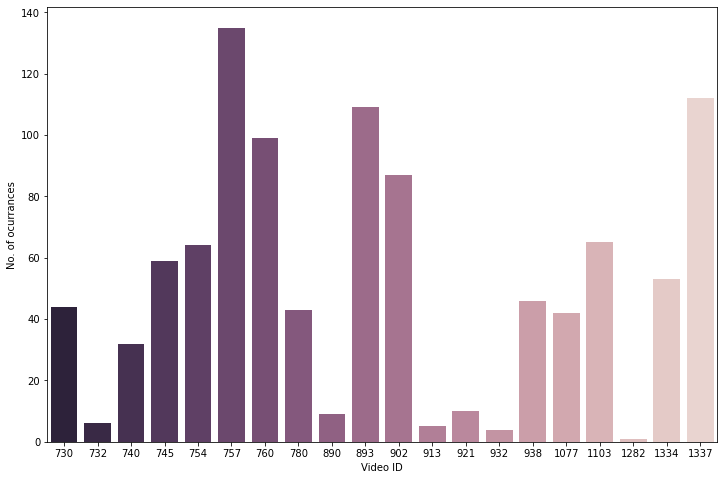

In [34]:
cdf = train.groupby("video_id").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)

plt.subplots(figsize=(12,8))
sns.barplot(x="video_count", y="video_id", data=cdf, palette=sns.cubehelix_palette(n_colors=20, reverse=True))
plt.xlabel("Video ID")
plt.ylabel("No. of ocurrances")
plt.show()

Conclusions drawn from the EDA:
   - 

   - No missing values in either of the datasets
   - The pattern or trend in categorical distributions within each feature is similar in train and test set
   - video_is and category_id are highly correlated
   - We have detected outliers in 2 out of the 3 non-id numerical columns. It is imperative to handle the outliers in age column as there is a lot of unstability in scores for folks beyond 55 years as seen in the catplot.

## 3) <u>Feature Engineering</u>
After getting a fair understanding of our data from the previous section, we will now be performing certain operations on the data to clean it and make it model-ready. We will be operating upon both the train and test data simultaneously
   - Encoding

### Encoding

Encoding is another key step in the machine learning workflow. As the algorithms understand only numbers hence, it is necessary for us to convert all categorical features into numerical ones before we can feed the data into our model. There are different ways of achieving this. Here we are going to use 2 of these:
   1. Label encoding the categorical features: `gender`, `prefession`
   
One-hot encoding is recommended for features with numerous categories. Therefoe, we will refrain from using it on features with 2 or 3 groups.

In [35]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [36]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

def LE(train, test):
    le = LabelEncoder()
    for col in train.columns:
        if (train[col].dtypes == 'object'):
            train[col] = le.fit_transform(train[col])
            le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
            test[col] = test[col].apply(lambda x: le_dict.get(x, -1))
    return train, test

train_df, test_df = LE(train, test)

In [37]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,1,1,180,1000,4.33
1,2,5304,32,132,14,0,1,330,714,1.79
2,3,1840,12,24,19,1,1,180,138,4.35
3,4,12597,23,112,19,1,1,220,613,3.77
4,5,13626,23,112,27,1,2,220,613,3.13


In [38]:
# Dropping the row_id as that is is just a unique identifier and does not help in determining the target. 
train.drop('row_id', axis=1, inplace=True)
row_id = test['row_id']                      # for submission file
test.drop('row_id', axis=1, inplace=True)

## 4) <u>Feature Selection</u>

Finally, let's see how strong the features are in terms of determining the target variable. Generally features with very low correlation score is of no importance in model training and it is advisable to get rid of any irrelevant features before modelling.

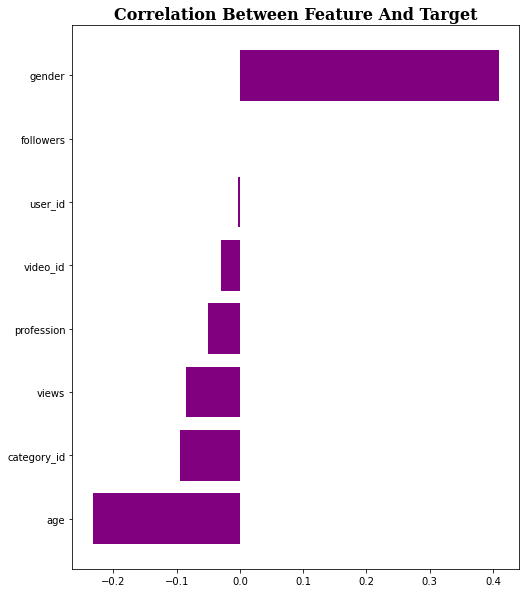

str

In [39]:
corr_df = train.select_dtypes('number').drop('engagement_score', axis=1).corrwith(train['engagement_score']).sort_values().reset_index().rename(columns = {'index':'feature' ,0:'correlation'})

fig , ax = plt.subplots(figsize  = (8,10))
ax.barh(y =corr_df.feature , width = corr_df.correlation, color='purple' )
ax.set_title('correlation between feature and target'.title() ,
            fontsize = 16 , fontfamily = 'serif' , fontweight = 'bold')
plt.show()
type(corr_df.feature[0])

In [40]:
columns_with_low_correlation = corr_df[(corr_df.correlation >-0.02) & (corr_df.correlation<0.02)].feature.tolist()
columns_with_low_correlation

['user_id', 'followers']

In [41]:
# # Dropping the features which are least correlated with our target variable
train.drop(['followers','user_id'], axis=1, inplace=True)
test.drop(['followers','user_id'], axis=1, inplace=True)

In [42]:
train.drop('video_id', axis=1, inplace=True)
test.drop('video_id', axis=1, inplace=True)

In [43]:
train.head()

,category_id,age,gender,profession,views,engagement_score
0,37,24,1,1,1000,4.33
1,32,14,0,1,714,1.79
2,12,19,1,1,138,4.35
3,23,19,1,1,613,3.77
4,23,27,1,2,613,3.13


Checkpoint! 
  - [x] Loading and understanding the data
  - [x] EDA
  - [x] Feature Engineering
  - [x] Feature Selection
  - [ ] Base Model
  - [ ] Model Comparison
  - [ ] Conclusions
  - [ ]  Next Steps
  
We have completed a very important part of machine learning workflow, data cleaning. It is highly recommended to store the model-ready data before proceeding further.

In [52]:
train.to_csv('clean_train.csv')
test.to_csv('clean_test.csv')

## 5) <u>Modeling</u>

Let us start with splitting the train set into 2 parts which will be used in evaluating the model performance.
Starting with a simple linear regression as a base model. Then, compare the performance of random forest and Light GBM. We will also tune the hyperparameters to get the optimal model performance.

### Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

X= train.drop('engagement_score',axis=1)
y= train['engagement_score']
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [54]:
# !pip install xgboost

In [55]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [56]:
def model_score(model, txt):
    '''
    Printing the performance metrics:
    R2 Square
    
    Parameters:
    model: Trained Model
    txt: To print the results for each model
    '''
    #Predicting the SalePrices using test set 
    y_pred = model.predict(x_test)
    x_pred = model.predict(x_train)

    # Printing the metrics
    print(txt, model.score(x_test,y_test))
    print('R2 square on train:',metrics.r2_score(y_train, x_pred))
    print('R2 square on test:',metrics.r2_score(y_test, y_pred))
    return x_pred, y_pred

In [57]:
def model_performance(y_pred, original_col, fitted_col, txt):
    '''
    This is to visualize the model performance.
    Parameters: 
    y_pred - Series of the predicted values
    original_col - Color of the actual value line
    fitted_col - color of the predicted value line
    '''
    plt.figure(figsize=(5,5))
    ax1 = sns.distplot(y_test, hist=False, color=original_col, label='Actual Value')
    sns.distplot(y_pred, hist=False, color=fitted_col, label='Predicted Value', ax=ax1)
    plt.title(txt, fontsize=20)

### Catboost

In [61]:
# !pip install catboost
from catboost import CatBoostRegressor

In [62]:
cbr = CatBoostRegressor(learning_rate=0.03, max_depth=6, n_estimators=1000, subsample=0.5, )
cbr.fit(x_train, y_train)

0:	learn: 0.8545954	total: 169ms	remaining: 2m 48s
1:	learn: 0.8476256	total: 177ms	remaining: 1m 28s
2:	learn: 0.8410327	total: 185ms	remaining: 1m 1s
3:	learn: 0.8348845	total: 192ms	remaining: 47.9s
4:	learn: 0.8290232	total: 200ms	remaining: 39.9s
5:	learn: 0.8232461	total: 208ms	remaining: 34.5s
6:	learn: 0.8177577	total: 216ms	remaining: 30.6s
7:	learn: 0.8126672	total: 223ms	remaining: 27.7s
8:	learn: 0.8077800	total: 231ms	remaining: 25.4s
9:	learn: 0.8030479	total: 238ms	remaining: 23.6s
10:	learn: 0.7988783	total: 246ms	remaining: 22.1s
11:	learn: 0.7947883	total: 253ms	remaining: 20.9s
12:	learn: 0.7908701	total: 261ms	remaining: 19.8s
13:	learn: 0.7871493	total: 268ms	remaining: 18.9s
14:	learn: 0.7834975	total: 276ms	remaining: 18.1s
15:	learn: 0.7801451	total: 283ms	remaining: 17.4s
16:	learn: 0.7771231	total: 291ms	remaining: 16.8s
17:	learn: 0.7739998	total: 299ms	remaining: 16.3s
18:	learn: 0.7711655	total: 306ms	remaining: 15.8s
19:	learn: 0.7684729	total: 314ms	remai

165:	learn: 0.7013067	total: 1.51s	remaining: 7.61s
166:	learn: 0.7011677	total: 1.52s	remaining: 7.6s
167:	learn: 0.7011133	total: 1.53s	remaining: 7.6s
168:	learn: 0.7010764	total: 1.54s	remaining: 7.59s
169:	learn: 0.7009725	total: 1.55s	remaining: 7.58s
170:	learn: 0.7009424	total: 1.56s	remaining: 7.56s
171:	learn: 0.7008861	total: 1.57s	remaining: 7.54s
172:	learn: 0.7008448	total: 1.57s	remaining: 7.52s
173:	learn: 0.7007694	total: 1.58s	remaining: 7.51s
174:	learn: 0.7007068	total: 1.59s	remaining: 7.49s
175:	learn: 0.7006416	total: 1.6s	remaining: 7.47s
176:	learn: 0.7005935	total: 1.6s	remaining: 7.45s
177:	learn: 0.7005150	total: 1.61s	remaining: 7.44s
178:	learn: 0.7003552	total: 1.62s	remaining: 7.42s
179:	learn: 0.7003133	total: 1.63s	remaining: 7.4s
180:	learn: 0.7002859	total: 1.63s	remaining: 7.39s
181:	learn: 0.7002036	total: 1.64s	remaining: 7.37s
182:	learn: 0.7001620	total: 1.65s	remaining: 7.35s
183:	learn: 0.7001055	total: 1.65s	remaining: 7.34s
184:	learn: 0.700

333:	learn: 0.6946181	total: 2.8s	remaining: 5.58s
334:	learn: 0.6945982	total: 2.81s	remaining: 5.58s
335:	learn: 0.6945699	total: 2.82s	remaining: 5.57s
336:	learn: 0.6945409	total: 2.83s	remaining: 5.56s
337:	learn: 0.6945221	total: 2.83s	remaining: 5.55s
338:	learn: 0.6945004	total: 2.84s	remaining: 5.54s
339:	learn: 0.6944847	total: 2.85s	remaining: 5.53s
340:	learn: 0.6944443	total: 2.86s	remaining: 5.52s
341:	learn: 0.6944340	total: 2.86s	remaining: 5.51s
342:	learn: 0.6943917	total: 2.87s	remaining: 5.5s
343:	learn: 0.6943672	total: 2.88s	remaining: 5.49s
344:	learn: 0.6943496	total: 2.89s	remaining: 5.48s
345:	learn: 0.6943262	total: 2.89s	remaining: 5.47s
346:	learn: 0.6943232	total: 2.9s	remaining: 5.46s
347:	learn: 0.6943158	total: 2.91s	remaining: 5.45s
348:	learn: 0.6942979	total: 2.91s	remaining: 5.44s
349:	learn: 0.6942881	total: 2.92s	remaining: 5.42s
350:	learn: 0.6942781	total: 2.93s	remaining: 5.42s
351:	learn: 0.6942680	total: 2.94s	remaining: 5.4s
352:	learn: 0.69

495:	learn: 0.6919515	total: 4.29s	remaining: 4.36s
496:	learn: 0.6919304	total: 4.3s	remaining: 4.35s
497:	learn: 0.6919182	total: 4.32s	remaining: 4.35s
498:	learn: 0.6919052	total: 4.33s	remaining: 4.34s
499:	learn: 0.6918968	total: 4.34s	remaining: 4.34s
500:	learn: 0.6918846	total: 4.35s	remaining: 4.33s
501:	learn: 0.6918727	total: 4.36s	remaining: 4.33s
502:	learn: 0.6918580	total: 4.38s	remaining: 4.32s
503:	learn: 0.6918511	total: 4.38s	remaining: 4.32s
504:	learn: 0.6918398	total: 4.39s	remaining: 4.31s
505:	learn: 0.6918252	total: 4.4s	remaining: 4.3s
506:	learn: 0.6918115	total: 4.41s	remaining: 4.29s
507:	learn: 0.6917985	total: 4.42s	remaining: 4.28s
508:	learn: 0.6917840	total: 4.42s	remaining: 4.27s
509:	learn: 0.6917696	total: 4.43s	remaining: 4.26s
510:	learn: 0.6917587	total: 4.44s	remaining: 4.25s
511:	learn: 0.6917548	total: 4.45s	remaining: 4.24s
512:	learn: 0.6917447	total: 4.46s	remaining: 4.23s
513:	learn: 0.6917306	total: 4.47s	remaining: 4.23s
514:	learn: 0.6

663:	learn: 0.6902729	total: 5.78s	remaining: 2.92s
664:	learn: 0.6902600	total: 5.79s	remaining: 2.92s
665:	learn: 0.6902515	total: 5.8s	remaining: 2.91s
666:	learn: 0.6902463	total: 5.81s	remaining: 2.9s
667:	learn: 0.6902351	total: 5.82s	remaining: 2.89s
668:	learn: 0.6902220	total: 5.82s	remaining: 2.88s
669:	learn: 0.6902018	total: 5.83s	remaining: 2.87s
670:	learn: 0.6901950	total: 5.84s	remaining: 2.86s
671:	learn: 0.6901908	total: 5.85s	remaining: 2.85s
672:	learn: 0.6901871	total: 5.85s	remaining: 2.84s
673:	learn: 0.6901799	total: 5.86s	remaining: 2.83s
674:	learn: 0.6901759	total: 5.87s	remaining: 2.83s
675:	learn: 0.6901710	total: 5.87s	remaining: 2.81s
676:	learn: 0.6901647	total: 5.88s	remaining: 2.81s
677:	learn: 0.6901574	total: 5.89s	remaining: 2.8s
678:	learn: 0.6901530	total: 5.9s	remaining: 2.79s
679:	learn: 0.6901359	total: 5.9s	remaining: 2.78s
680:	learn: 0.6901285	total: 5.91s	remaining: 2.77s
681:	learn: 0.6901204	total: 5.92s	remaining: 2.76s
682:	learn: 0.690

829:	learn: 0.6890430	total: 7.06s	remaining: 1.45s
830:	learn: 0.6890400	total: 7.07s	remaining: 1.44s
831:	learn: 0.6890283	total: 7.08s	remaining: 1.43s
832:	learn: 0.6890220	total: 7.08s	remaining: 1.42s
833:	learn: 0.6890124	total: 7.09s	remaining: 1.41s
834:	learn: 0.6890042	total: 7.1s	remaining: 1.4s
835:	learn: 0.6889980	total: 7.11s	remaining: 1.39s
836:	learn: 0.6889922	total: 7.11s	remaining: 1.39s
837:	learn: 0.6889781	total: 7.12s	remaining: 1.38s
838:	learn: 0.6889695	total: 7.13s	remaining: 1.37s
839:	learn: 0.6889651	total: 7.14s	remaining: 1.36s
840:	learn: 0.6889546	total: 7.14s	remaining: 1.35s
841:	learn: 0.6889459	total: 7.15s	remaining: 1.34s
842:	learn: 0.6889396	total: 7.16s	remaining: 1.33s
843:	learn: 0.6889281	total: 7.17s	remaining: 1.32s
844:	learn: 0.6889202	total: 7.17s	remaining: 1.31s
845:	learn: 0.6889172	total: 7.18s	remaining: 1.31s
846:	learn: 0.6889138	total: 7.19s	remaining: 1.3s
847:	learn: 0.6889060	total: 7.2s	remaining: 1.29s
848:	learn: 0.68

In [63]:
cbr_x_reg, cbr_y_reg = model_score(cbr, 'CatBoost Regression Scores: ')

R2 square on train: 0.36285682868155533
R2 square on test: 0.3539477376664034


## Saving the model

In [66]:
import joblib

# # Save the model as a pickle in a file
# joblib.dump(cbr, 'score_model.pkl')

['score_model.pkl']

## 7) <u>Conclusions</u>

The dataset was not very messy; the best part was that there were no missing data. Some important features which would have been useful:
   - Date and Time of video upload
   - Likes and Dislikes on the video
   - Comments and Ratings enabled or disabled
   - Number of Shares
   - Duration of the video
   - Genre
   
Experiments performed and their outcomes:
   - Scaling did not help in improving the model performance. As we see that the feature values did not vary much and all the columns had values within a small range hence, scaling was not effective in our case
   - Linear Regression performed poorly. Even without hyperparameter tuning Random Forest and Light GBM did much better than Linear Regression
   - Dropping the irrelevant features during feature selection step did improve random forest model’s performance
   - Removing the video_id column which is highly correlated with category_id improved the model’s performance negligibly.

## 8) <u>Next Steps</u>

   - We can try extracting other features and see whether they help in predicting the score
    
   - We can experiment further with the values of the hyperparameters and see if we see any major difference
    
   - R-square is not a recommended performance metrics as it increases with increase in number of features giving us a false picture of our model. It is not always true that higher R-square value means a better model. A very good alternative would be adjuster R-square. Perhaps we can use this metric to judge our models.